In [96]:
import pandas as pd
import numpy as np


In [97]:
df= pd.read_csv('20220915_HackZurich_Sensirion_v1.csv')

In [98]:
df= df.set_index('Unnamed: 0')

In [99]:
df=df.reset_index(drop=True)

In [100]:
df
df.dropna(inplace=True)
df

,temperature_ventilation_system_fresh_air_in,temperature_ventilation_system_fresh_air_intermediate,temperature_ventilation_system_fresh_air_out,temperature_ventilation_system_used_air_in,temperature_ventilation_system_used_air_out,volumne_flow_ventitaltion_system_in,particulate_matter_outdoor_measured,temperature_outdoor,humidity_outdoor_measured,temperature_outdoor_estimated,...,co2_room_A,co2_room_B,particulate_matter_room_A,tvoc_room_A,temperature_room_B,humidity_room_B,particulate_matter_room_B,no2_room_B,tvoc_room_B,consumed_meals
24392,9.5,21.3,21.2,24.1,14.3,1.539,3.112320,17.9432,48.5074,10.777778,...,701.762882,599.263200,1.289938,124.179315,27.860642,26.686213,0.763475,7.874801,102.059537,0.0
24393,9.9,21.4,21.3,24.1,14.6,1.546,2.699660,17.9916,48.4568,11.166667,...,699.535093,603.749308,1.233930,109.762718,27.558985,26.923754,0.631309,9.945931,111.601766,0.0
24394,9.5,21.3,21.3,24.3,14.5,1.542,2.549805,17.8990,48.5050,11.555556,...,702.203897,587.549700,1.043705,423.863361,27.374495,27.065391,0.685259,9.773893,101.987839,0.0
24395,9.7,21.3,21.1,24.3,15.0,1.528,2.750230,18.2008,48.5656,11.944444,...,700.436547,593.112136,1.002943,565.279169,27.196626,27.206621,0.691362,9.531256,126.980274,0.0
24396,9.9,21.2,21.1,24.3,15.2,1.510,2.723460,17.9120,49.1832,12.333333,...,711.176851,600.279915,0.927376,700.512027,27.051102,27.414662,0.609332,9.132585,150.864803,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48756,8.7,19.4,18.8,23.5,12.3,4.787,11.177355,9.4280,44.4721,4.666667,...,605.251935,774.646862,2.888246,90.707738,27.405284,24.865241,2.386305,1.000030,77.945062,0.0
48757,8.4,19.3,19.5,23.4,12.2,4.790,10.998950,9.4147,44.5093,4.722222,...,576.601952,760.867947,2.813314,65.606216,27.395418,24.867784,2.156954,1.000030,88.360089,0.0
48758,8.6,19.3,18.7,23.4,12.3,4.805,9.771385,9.2407,44.5732,4.777778,...,545.288806,745.756775,2.496362,56.412480,27.382415,24.910716,2.339208,1.000030,87.627811,0.0
48759,8.6,19.3,18.9,23.3,12.3,4.808,9.738710,9.1177,44.6295,4.833333,...,521.903099,733.812476,2.352931,46.252538,27.371293,24.989241,2.149412,1.000030,143.649111,0.0


In [101]:
df.columns

Index(['temperature_ventilation_system_fresh_air_in',
       'temperature_ventilation_system_fresh_air_intermediate',
       'temperature_ventilation_system_fresh_air_out',
       'temperature_ventilation_system_used_air_in',
       'temperature_ventilation_system_used_air_out',
       'volumne_flow_ventitaltion_system_in',
       'particulate_matter_outdoor_measured', 'temperature_outdoor',
       'humidity_outdoor_measured', 'temperature_outdoor_estimated',
       'wind_speed_outdoor_estimated', 'wind_dir_outdoor_estimated',
       'precipitation_outdoor_estimated', 'humidity_outdoor_estimated',
       'visibility_outdoor_estimated', 'pressure_outdoor_estimated',
       'cloudcover_outdoor_estimated', 'dewpoint_outdoor_estimated',
       'wind_gust_outdoor_estimated', 'uv_outdoor_estimated', 'co2_room_A',
       'co2_room_B', 'particulate_matter_room_A', 'tvoc_room_A',
       'temperature_room_B', 'humidity_room_B', 'particulate_matter_room_B',
       'no2_room_B', 'tvoc_room_B', 'co

In [102]:
df_A= df[['temperature_ventilation_system_fresh_air_in',
       'temperature_ventilation_system_fresh_air_intermediate',
       'temperature_ventilation_system_fresh_air_out',
       'temperature_ventilation_system_used_air_in',
       'temperature_ventilation_system_used_air_out',
       'volumne_flow_ventitaltion_system_in',
       'particulate_matter_outdoor_measured', 'temperature_outdoor',
       'humidity_outdoor_measured', 'temperature_outdoor_estimated',
       'wind_speed_outdoor_estimated', 'wind_dir_outdoor_estimated',
       'precipitation_outdoor_estimated', 'humidity_outdoor_estimated',
       'visibility_outdoor_estimated', 'pressure_outdoor_estimated',
       'cloudcover_outdoor_estimated', 'dewpoint_outdoor_estimated',
       'wind_gust_outdoor_estimated', 'uv_outdoor_estimated', 'co2_room_A',
        'particulate_matter_room_A', 'tvoc_room_A','consumed_meals']]

df_B=df[['temperature_ventilation_system_fresh_air_in',
       'temperature_ventilation_system_fresh_air_intermediate',
       'temperature_ventilation_system_fresh_air_out',
       'temperature_ventilation_system_used_air_in',
       'temperature_ventilation_system_used_air_out',
       'volumne_flow_ventitaltion_system_in',
       'particulate_matter_outdoor_measured', 'temperature_outdoor',
       'humidity_outdoor_measured', 'temperature_outdoor_estimated',
       'wind_speed_outdoor_estimated', 'wind_dir_outdoor_estimated',
       'precipitation_outdoor_estimated', 'humidity_outdoor_estimated',
       'visibility_outdoor_estimated', 'pressure_outdoor_estimated',
       'cloudcover_outdoor_estimated', 'dewpoint_outdoor_estimated',
       'wind_gust_outdoor_estimated', 'uv_outdoor_estimated','co2_room_B', 'particulate_matter_room_B',
       'tvoc_room_B', 'consumed_meals']]

In [103]:
df_A=df_A.rename(columns={"co2_room_A": "co2", "particulate_matter_room_A":"particulate_matter","tvoc_room_A": "tvoc"})
df_B=df_B.rename(columns={"co2_room_B": "co2", "particulate_matter_room_B":"particulate_matter","tvoc_room_B": "tvoc"})

In [104]:
frames = [df_A,df_B]

result = pd.concat(frames)

<AxesSubplot:>

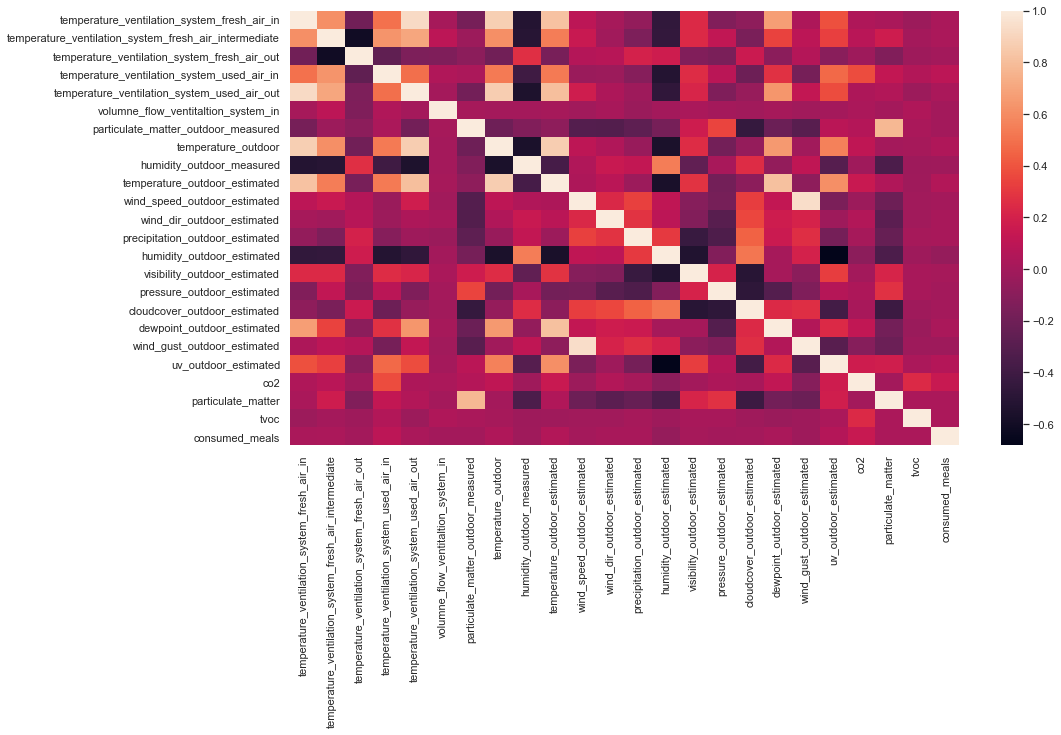

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

                     
                     
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(result.corr())

In [106]:
min(result['co2'])

371.0377718239269

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(result.drop(['co2'], axis=1), result['co2'], random_state=42,test_size=0.33)

In [108]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [109]:
y_pred = regr.predict(X_test)

In [110]:
y_pred

array([452.89272103, 456.79518161, 452.89272103, ..., 657.07224698,
       552.27950765, 452.89272103])

In [111]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(Y_test, y_pred)))
r_squared = regr.score(X_test,Y_test)
print(r_squared)

110.89417280955224
0.26004548954124374


c:\users\sarah\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


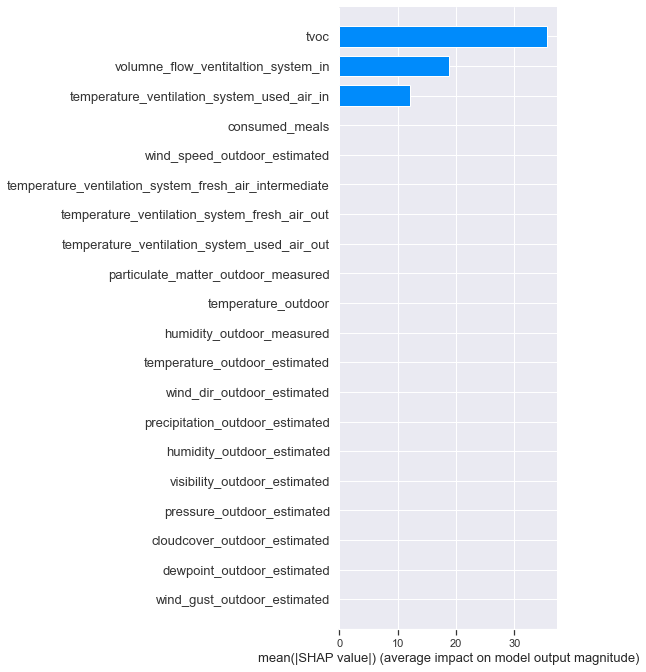

In [122]:
import shap
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [123]:
shap_values

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
        -16.74392608,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -24.85174351,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -16.74392608,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        140.79758813,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -10.2219296 ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -29.06967847,   0.        ]])

In [120]:
result.drop(['co2'], axis=1).columns

Index(['temperature_ventilation_system_fresh_air_in',
       'temperature_ventilation_system_fresh_air_intermediate',
       'temperature_ventilation_system_fresh_air_out',
       'temperature_ventilation_system_used_air_in',
       'temperature_ventilation_system_used_air_out',
       'volumne_flow_ventitaltion_system_in',
       'particulate_matter_outdoor_measured', 'temperature_outdoor',
       'humidity_outdoor_measured', 'temperature_outdoor_estimated',
       'wind_speed_outdoor_estimated', 'wind_dir_outdoor_estimated',
       'precipitation_outdoor_estimated', 'humidity_outdoor_estimated',
       'visibility_outdoor_estimated', 'pressure_outdoor_estimated',
       'cloudcover_outdoor_estimated', 'dewpoint_outdoor_estimated',
       'wind_gust_outdoor_estimated', 'uv_outdoor_estimated',
       'particulate_matter', 'tvoc', 'consumed_meals'],
      dtype='object')